In [118]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib
from statsmodels.graphics.tsaplots import plot_acf
# import pmdarima as pm

# Import Data

In [133]:
path = r"C:/Users/TurnerJosh/Desktop/SensitiveData/GoodSalesData1.xlsx"
df = pd.read_excel(path)
df = df.sort_values('Invoice Date')
df = df.set_index('Invoice Date')

In [120]:
df.columns

Index(['Charge Type', 'Order Type', 'Sales Invoice Count', 'Charge Amount',
       'COGS Amount', 'Cost Adjustment Amount', 'Cost Amount',
       'Discount Amount', 'Invoice Amount'],
      dtype='object')

In [139]:
df = df[[ 'Sales Invoice Count', 'Charge Amount',
       'COGS Amount', 'Cost Adjustment Amount', 'Cost Amount',
       'Discount Amount', 'Invoice Amount']]

In [140]:
df.isna().sum()

Sales Invoice Count       0
Charge Amount             0
COGS Amount               0
Cost Adjustment Amount    0
Cost Amount               0
Discount Amount           0
Invoice Amount            0
dtype: int64

In [142]:
df.corr()

,Sales Invoice Count,Charge Amount,COGS Amount,Cost Adjustment Amount,Cost Amount,Discount Amount,Invoice Amount
Sales Invoice Count,1.000000,0.295400,0.555214,-0.032344,0.552373,-0.283878,0.564738
Charge Amount,0.295400,1.000000,-0.141259,0.006489,-0.140377,0.077731,-0.128180
COGS Amount,0.555214,-0.141259,1.000000,-0.068215,0.995798,-0.402016,0.984933
Cost Adjustment Amount,-0.032344,0.006489,-0.068215,1.000000,-0.159295,0.003512,-0.071337
Cost Amount,0.552373,-0.140377,0.995798,-0.159295,1.000000,-0.398132,0.981175
Discount Amount,-0.283878,0.077731,-0.402016,0.003512,-0.398132,1.000000,-0.388127
Invoice Amount,0.564738,-0.128180,0.984933,-0.071337,0.981175,-0.388127,1.000000


In [144]:
# heatmap
# import numpy as np 
# from pandas import DataFrame
# import seaborn as sns
# %matplotlib inline


# sns.heatmap(df, annot=True)

In [121]:
ts = df['Charge Amount']

# Resample to monthly (if needed)

In [145]:
# Resamples to monthly
# ts_month_avg = df['Charge Amount']

ts_month_avg = df['Charge Amount'].resample('MS').mean()
# ts_month_avg.plot(figsize = (15, 6))
# plt.show()

In [146]:
# Drop nans
ts_month_avg.dropna(inplace=True)

In [101]:
# ts_month_avg = ts_month_avg.asfreq('M')

In [147]:
ts_month_avg.isna().sum()

0

# Seasonality plot

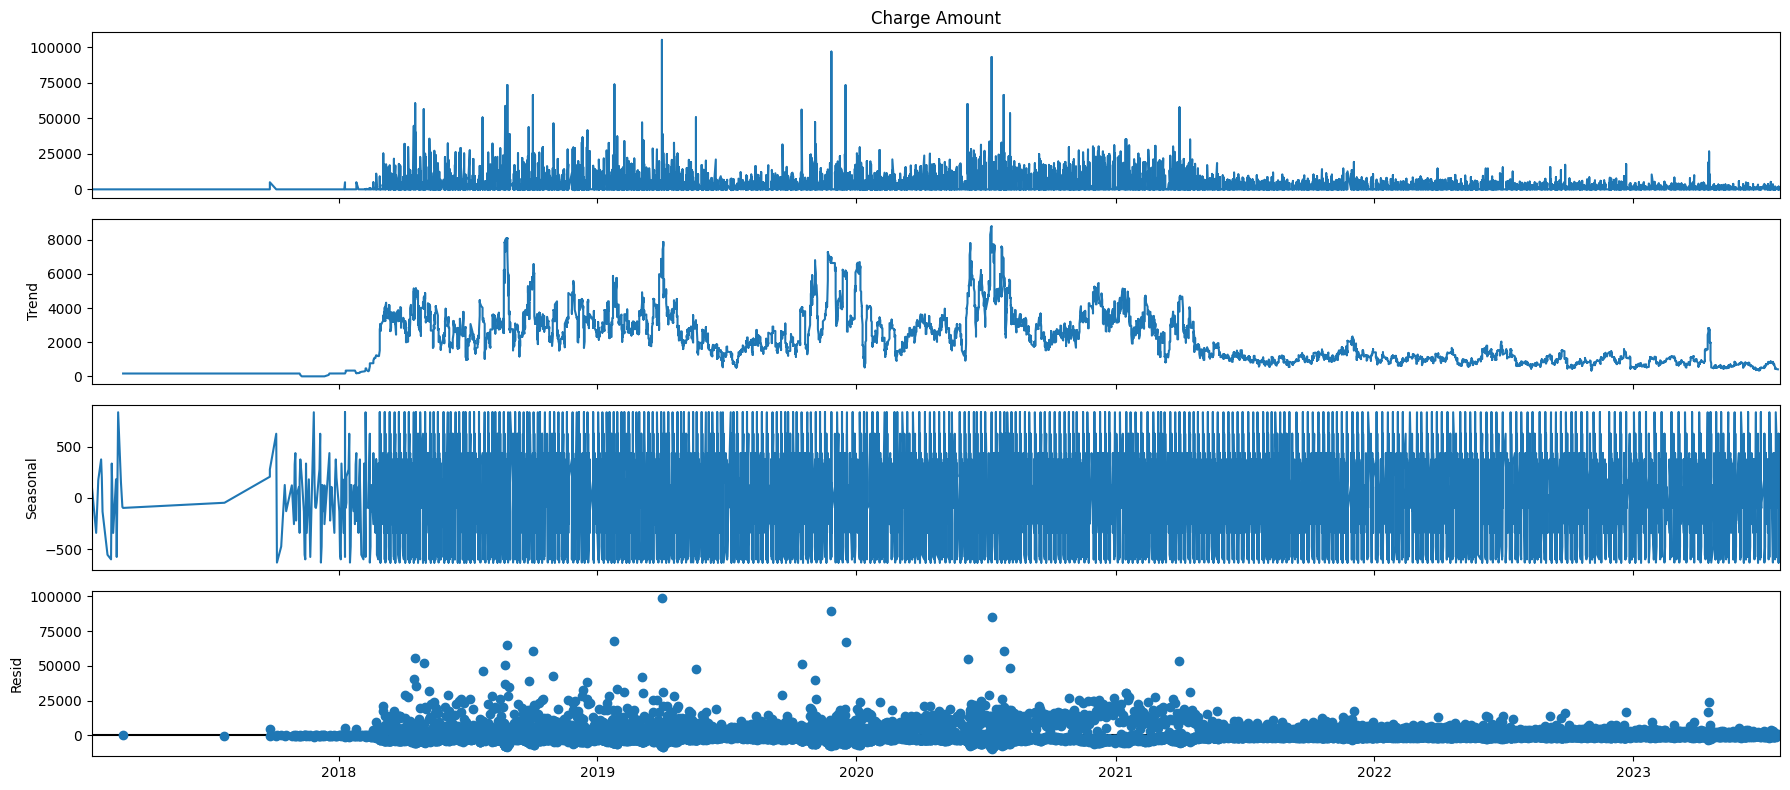

In [155]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ts, model='additive',period=30)
fig = decomposition.plot()
plt.show()

In [107]:
ts_month_avg

Invoice Date
2017-01-01       0.000000
2017-02-01       0.000000
2017-03-01       0.000000
2017-07-01       0.000000
2017-09-01    2500.000000
                 ...     
2023-03-01     812.282828
2023-04-01    1280.708738
2023-05-01     643.320755
2023-06-01     536.068627
2023-07-01     634.729730
Name: Charge Amount, Length: 75, dtype: float64

# Auto Correlation plot

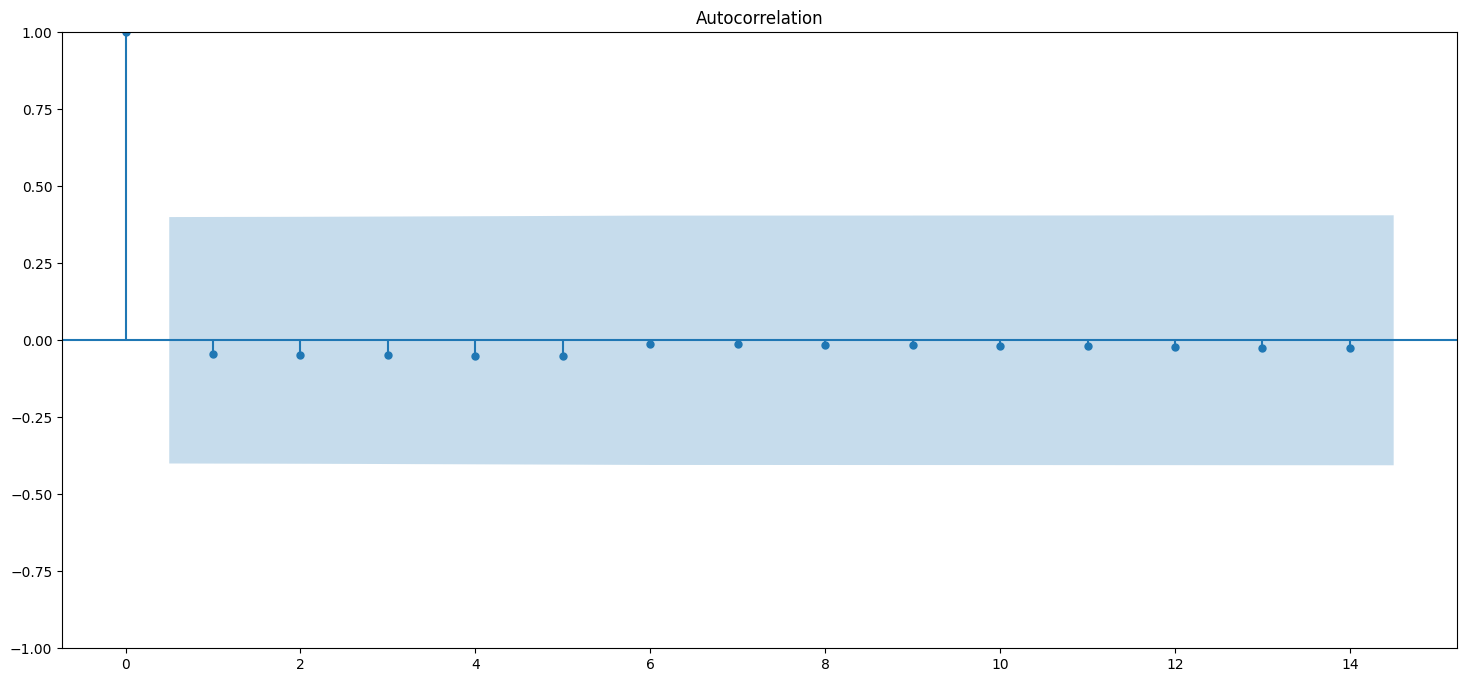

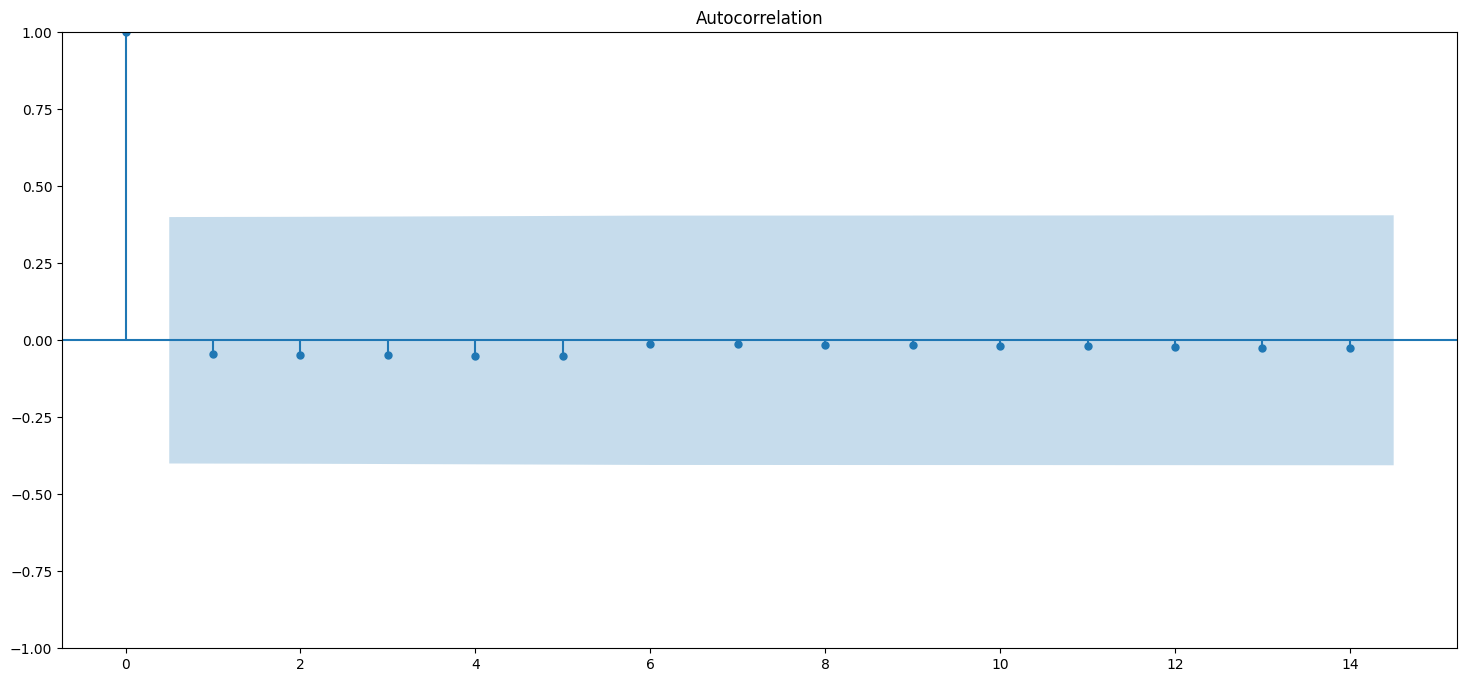

In [131]:
# plot_series = df[df.index<pd.Timestamp(df.index[1].date())]
# plot_series = ts[ts.index<pd.Timestamp(ts.index[1].date())]

plot_acf(ts[:24])
# plot_series.shape

# Tests for Stationarity

In [151]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

# print(adf_test(ts_month_avg))
# If p value is less than the critical value then there is stationarity (reject the null)
print(adf_test(ts))

Results of Dickey-Fuller Test:
Test Statistic                -8.195047e+00
p-value                        7.488538e-13
#Lags Used                     3.600000e+01
Number of Observations Used    8.602000e+03
Critical Value (1%)           -3.431110e+00
Critical Value (5%)           -2.861876e+00
Critical Value (10%)          -2.566949e+00
dtype: float64
None


In [127]:
pd.Timestamp(ts.index[1].date())

Timestamp('2017-01-24 00:00:00')

In [87]:
df.columns

Index(['Charge Type', 'Order Type', 'Sales Invoice Count', 'Charge Amount',
       'COGS Amount', 'Cost Adjustment Amount', 'Cost Amount',
       'Discount Amount', 'Invoice Amount'],
      dtype='object')

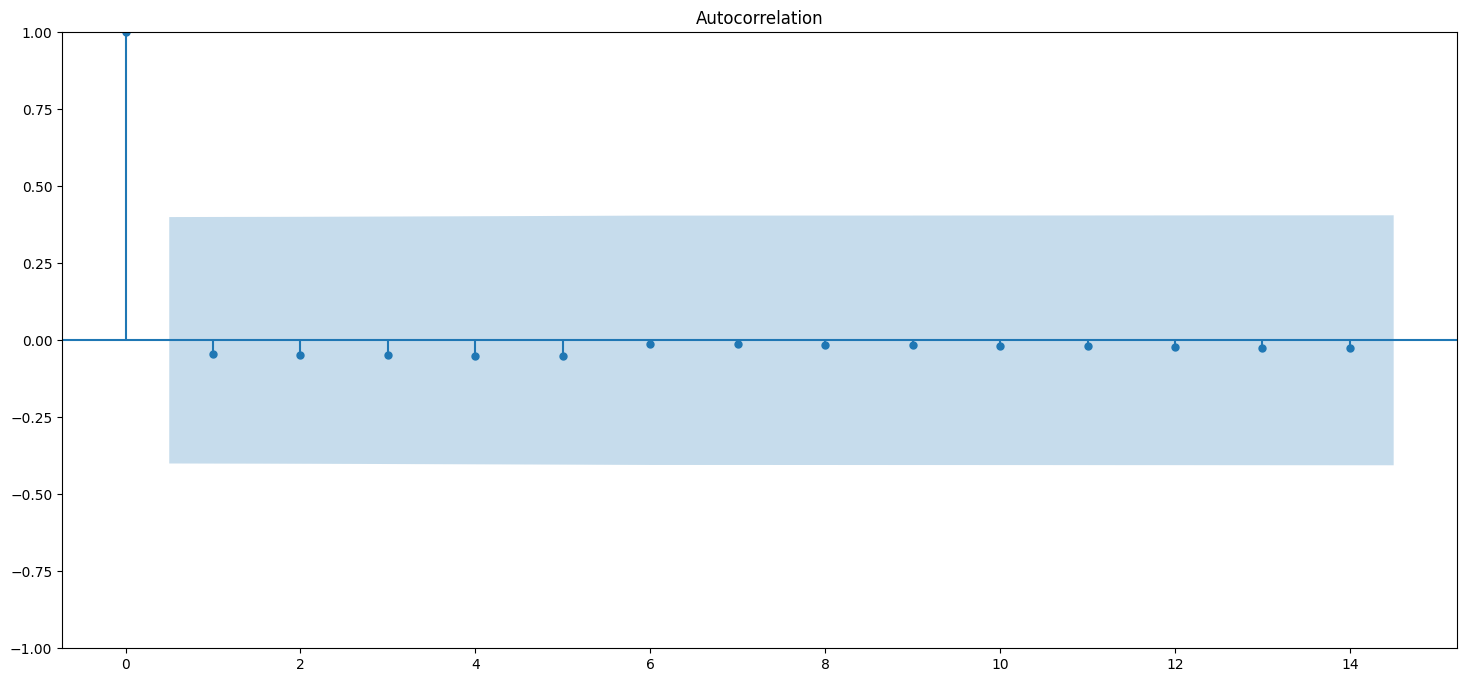

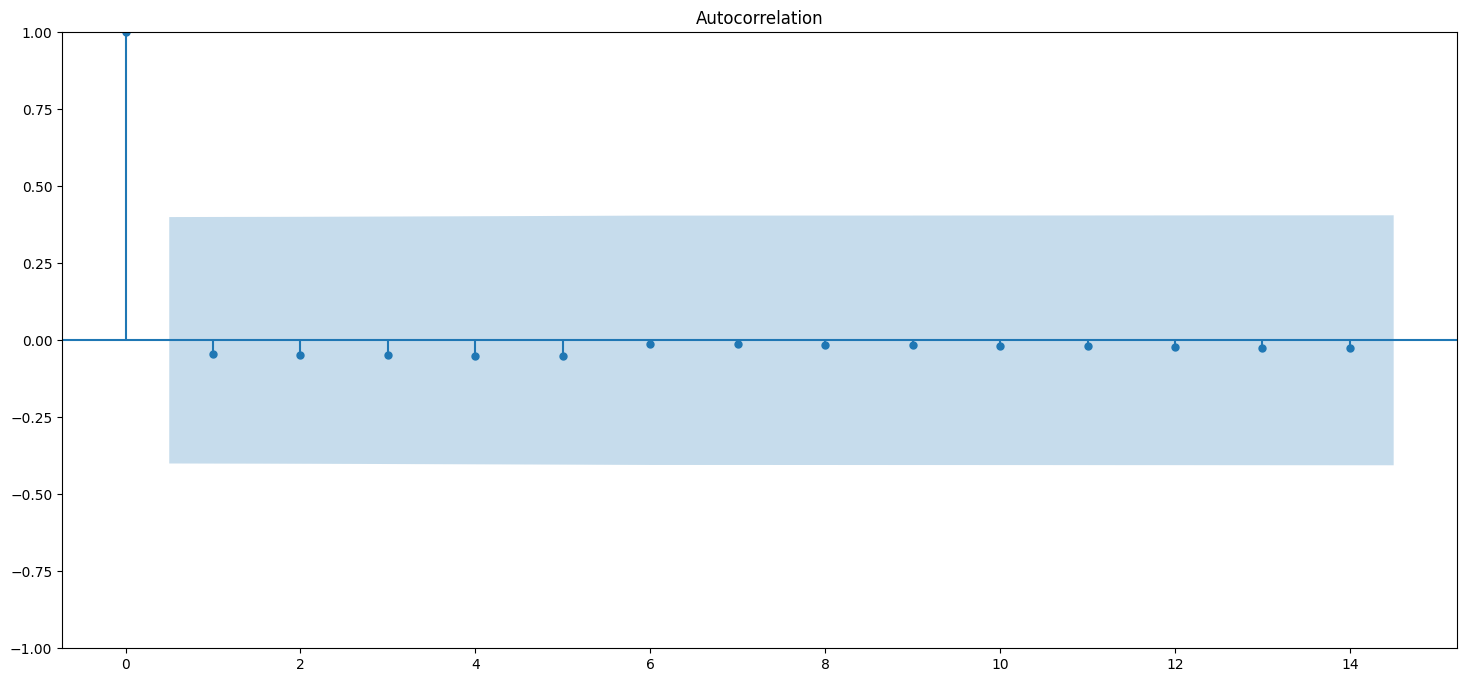

In [154]:
# series = df['Charge Amount']
# plot_series = series[series.index<pd.Timestamp(series.index[1].date())]
plot_acf(ts[0:24])

In [85]:
plot_series.shape

(1, 9)

In [75]:
pd.Timestamp(df.index[1].date())

Timestamp('2017-01-24 00:00:00')